In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.shape

(614, 13)

In [6]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
# Checking number of unique values in each columns
count = 1
for x in df:
    print(f'{count}. {x}: {df[x].nunique()}')
    print(f'{df[x].value_counts()}', end = '\n----------\n\n' )    
    count += 1

1. Loan_ID: 614
LP002527    1
LP001870    1
LP002560    1
LP002424    1
LP001041    1
           ..
LP001497    1
LP002984    1
LP002130    1
LP002753    1
LP001643    1
Name: Loan_ID, Length: 614, dtype: int64
----------

2. Gender: 2
Male      489
Female    112
Name: Gender, dtype: int64
----------

3. Married: 2
Yes    398
No     213
Name: Married, dtype: int64
----------

4. Dependents: 4
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
----------

5. Education: 2
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
----------

6. Self_Employed: 2
No     500
Yes     82
Name: Self_Employed, dtype: int64
----------

7. ApplicantIncome: 505
2500    9
6000    6
2600    6
4583    6
4166    5
       ..
5503    1
3450    1
2425    1
2423    1
4095    1
Name: ApplicantIncome, Length: 505, dtype: int64
----------

8. CoapplicantIncome: 287
0.0       273
2500.0      5
2083.0      5
1666.0      5
1625.0      3
         ... 
2365.0      1
1695.0      1
24

In [10]:
# Dropping unnecessary columns.
df.drop(['Loan_ID'], axis = 1, inplace = True)

In [11]:
df.shape

(614, 12)

In [12]:
cont_data = df.select_dtypes(exclude = ['object'] )
cont_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


In [13]:
cont_data.isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
dtype: int64

In [14]:
## filling the null values

In [15]:
cont_data['LoanAmount'].fillna(cont_data['LoanAmount'].mean(),inplace=True)

C:\Users\Rakesh Lodem\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [16]:
cont_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,146.412162,360.0,1.0
1,4583,1508.0,128.000000,360.0,1.0
2,3000,0.0,66.000000,360.0,1.0
3,2583,2358.0,120.000000,360.0,1.0
4,6000,0.0,141.000000,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0
610,4106,0.0,40.000000,180.0,1.0
611,8072,240.0,253.000000,360.0,1.0
612,7583,0.0,187.000000,360.0,1.0


In [17]:
cont_data.isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
dtype: int64

In [18]:
cont_data['Loan_Amount_Term'].fillna(cont_data['Loan_Amount_Term'].mean(),inplace=True)
cont_data

C:\Users\Rakesh Lodem\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,146.412162,360.0,1.0
1,4583,1508.0,128.000000,360.0,1.0
2,3000,0.0,66.000000,360.0,1.0
3,2583,2358.0,120.000000,360.0,1.0
4,6000,0.0,141.000000,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0
610,4106,0.0,40.000000,180.0,1.0
611,8072,240.0,253.000000,360.0,1.0
612,7583,0.0,187.000000,360.0,1.0


In [19]:
cont_data.isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
dtype: int64

In [20]:
cont_data['Credit_History'].fillna(cont_data['Credit_History'].mean(),inplace=True)
cont_data

C:\Users\Rakesh Lodem\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,146.412162,360.0,1.0
1,4583,1508.0,128.000000,360.0,1.0
2,3000,0.0,66.000000,360.0,1.0
3,2583,2358.0,120.000000,360.0,1.0
4,6000,0.0,141.000000,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0
610,4106,0.0,40.000000,180.0,1.0
611,8072,240.0,253.000000,360.0,1.0
612,7583,0.0,187.000000,360.0,1.0


In [21]:
cont_data.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [22]:
## we have removed null values in the contiuous data

In [23]:
cont_data.shape

(614, 5)

In [24]:
cont_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


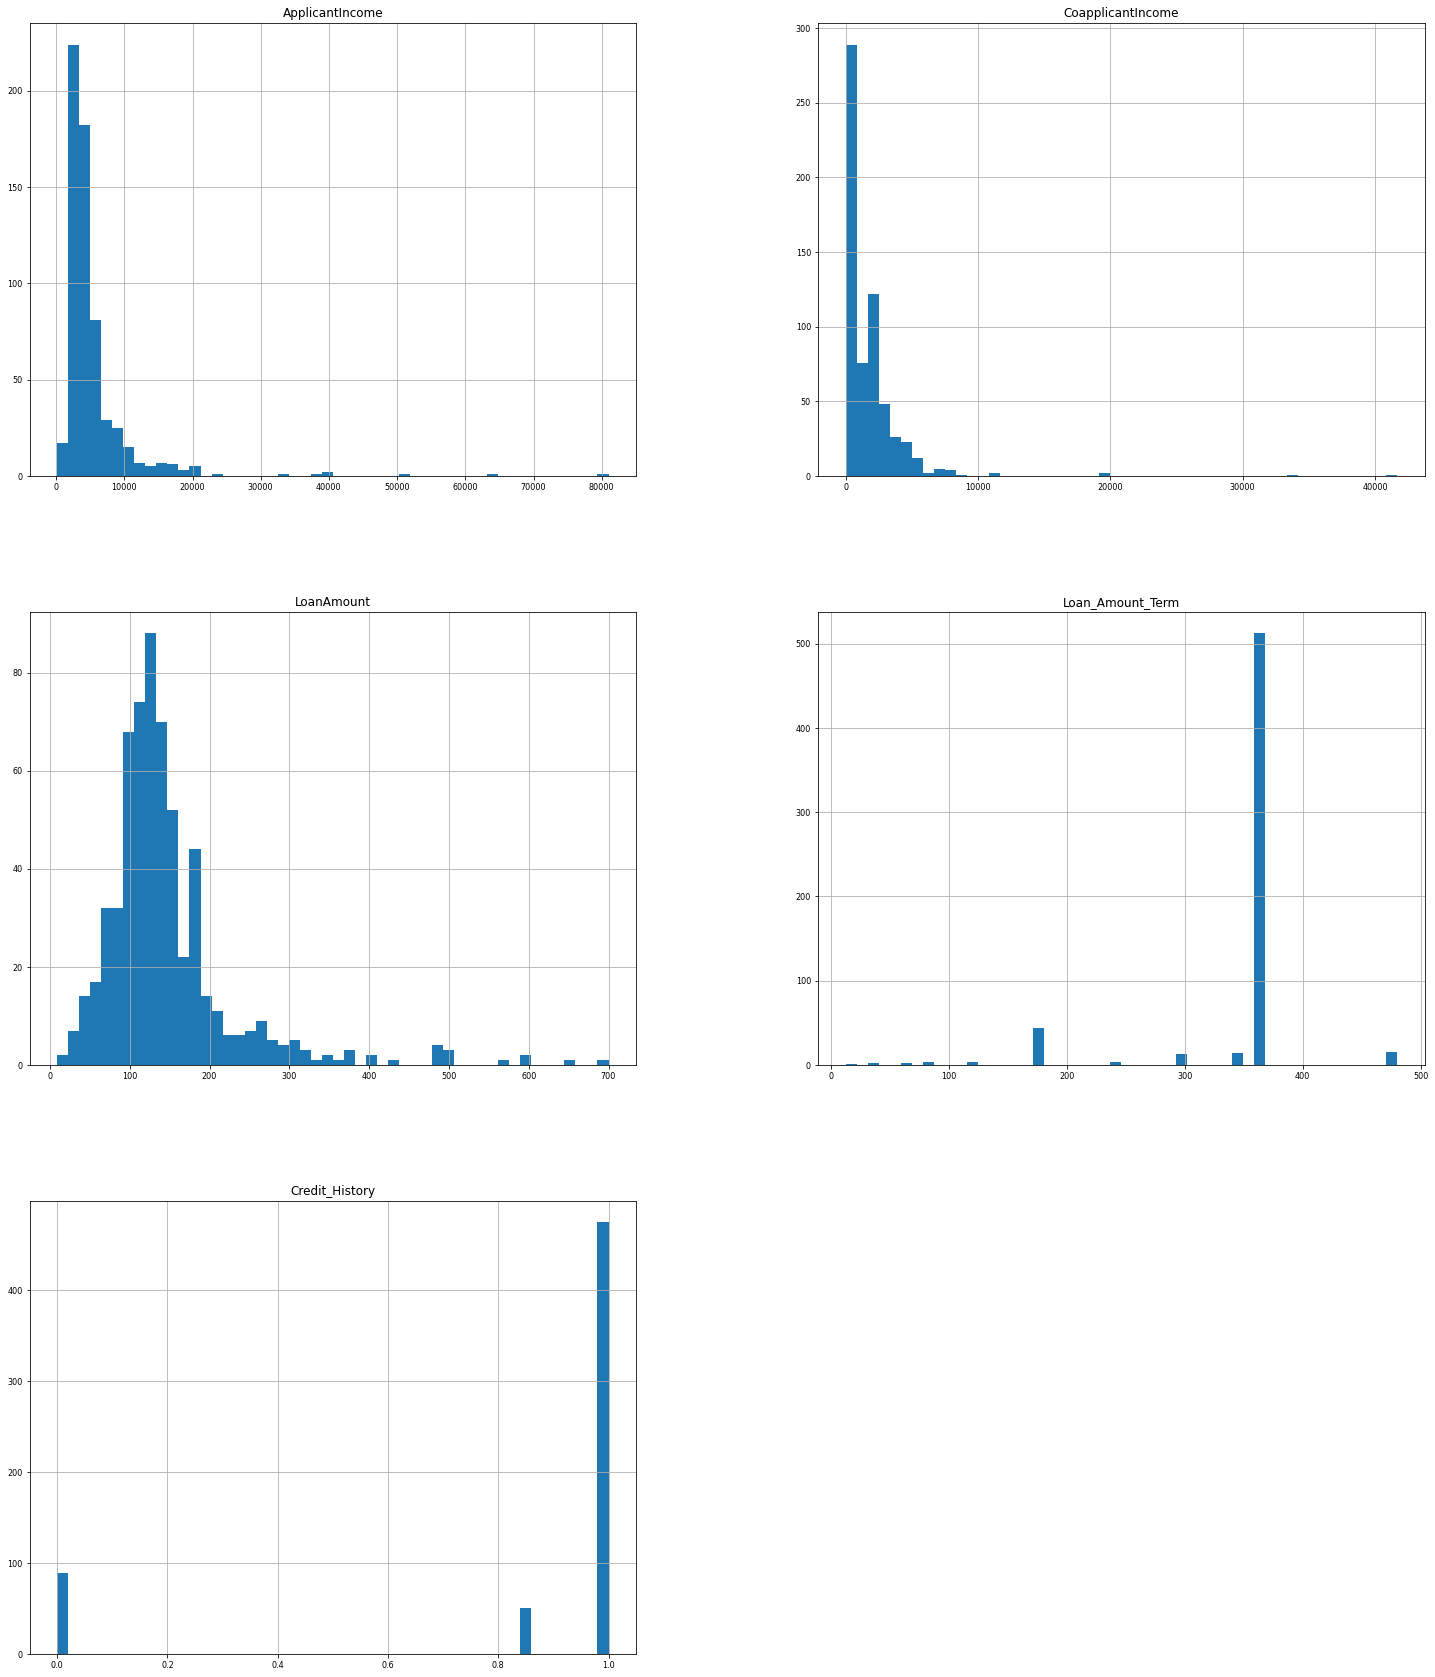

In [25]:
cont_data.hist(figsize = (25, 30), bins = 50, xlabelsize = 8, ylabelsize = 8)
plt.show()

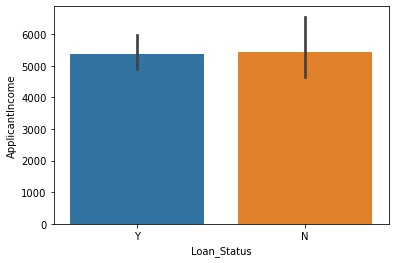

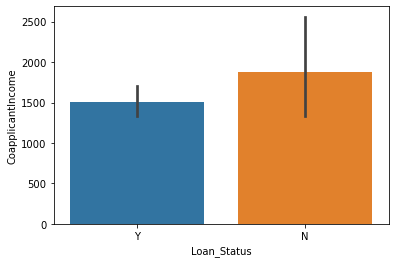

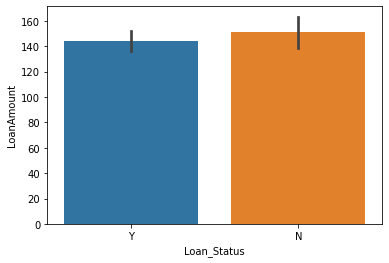

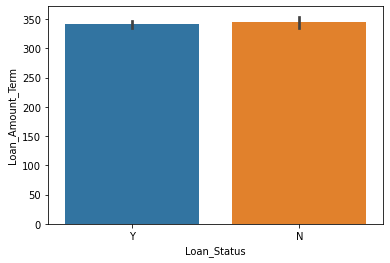

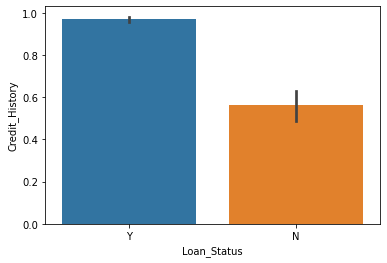

In [26]:
for i in cont_data:
    sns.barplot(y = cont_data[i], x = df['Loan_Status'])
    plt.show()

In [27]:
## checking for outliers

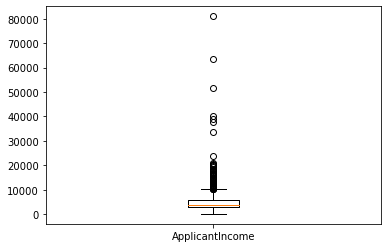

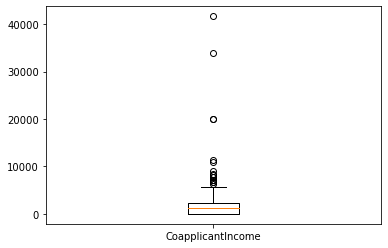

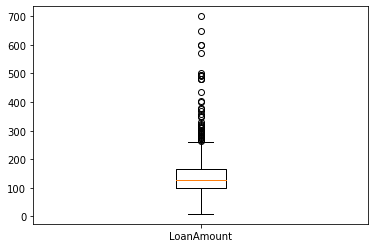

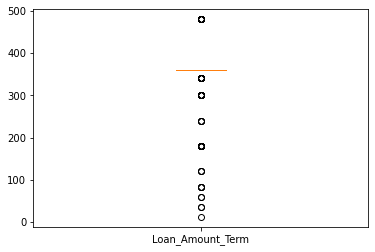

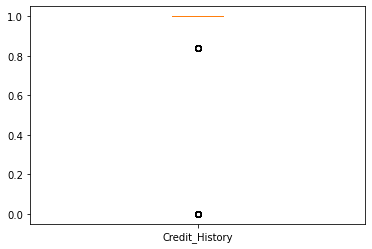

In [28]:
for i in cont_data:
    plt.boxplot(cont_data[i], labels = [i])
    plt.show()

In [29]:
a=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']

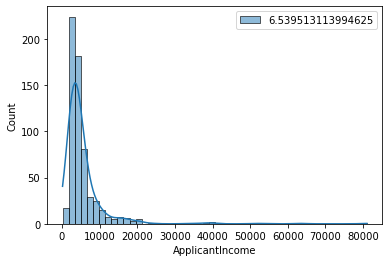

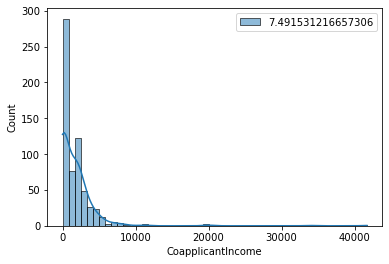

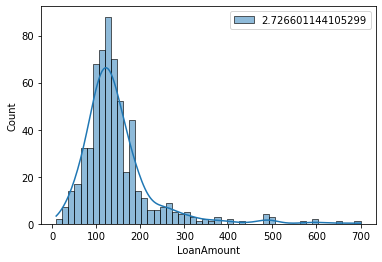

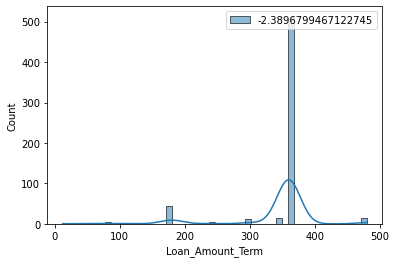

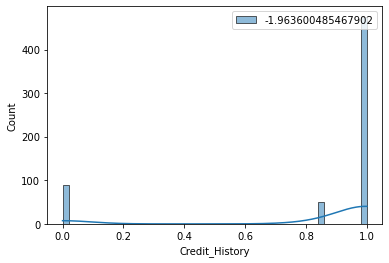

In [30]:
for i in a:
    sns.histplot(cont_data[i], kde = True, bins = 50, label = cont_data[i].skew())
    plt.legend(loc = 'upper right')
    plt.show()

In [31]:
## outliers removal

In [32]:
out_vars=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']

In [33]:
def outlierTreat(x):
    upper = x.quantile(.75) + 1.5 * (x.quantile(.75) - x.quantile(.25)) 
    lower = x.quantile(.25) - 1.5 * (x.quantile(.75) - x.quantile(.25))
    return x.clip(lower, upper)

In [34]:
cont_data.loc[:, out_vars] = cont_data.loc[:, out_vars].apply(outlierTreat)
cont_data.loc[:, out_vars]

C:\Users\Rakesh Lodem\anaconda3\lib\site-packages\pandas\core\indexing.py:1787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,146.412162,360.0,1.0
1,4583.0,1508.0,128.000000,360.0,1.0
2,3000.0,0.0,66.000000,360.0,1.0
3,2583.0,2358.0,120.000000,360.0,1.0
4,6000.0,0.0,141.000000,360.0,1.0
...,...,...,...,...,...
609,2900.0,0.0,71.000000,360.0,1.0
610,4106.0,0.0,40.000000,360.0,1.0
611,8072.0,240.0,253.000000,360.0,1.0
612,7583.0,0.0,187.000000,360.0,1.0


In [35]:
cont_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.0,614.0
mean,4617.111564,1419.702231,138.025354,360.0,1.0
std,2479.851729,1624.605892,55.773951,0.0,0.0
min,150.000000,0.000000,9.000000,360.0,1.0
25%,2877.500000,0.000000,100.250000,360.0,1.0
50%,3812.500000,1188.500000,129.000000,360.0,1.0
75%,5795.000000,2297.250000,164.750000,360.0,1.0
max,10171.250000,5743.125000,261.500000,360.0,1.0


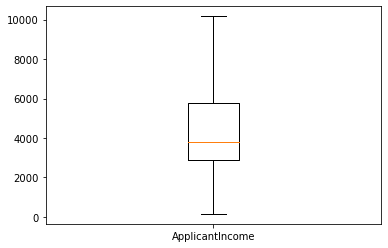

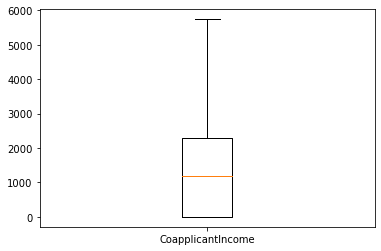

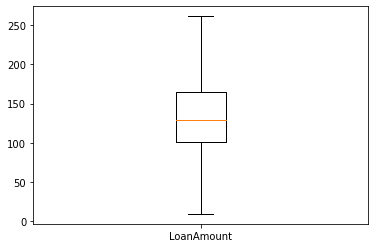

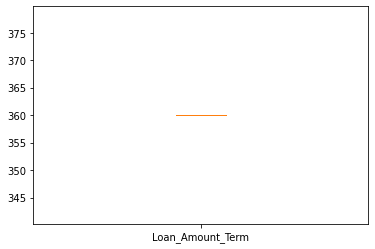

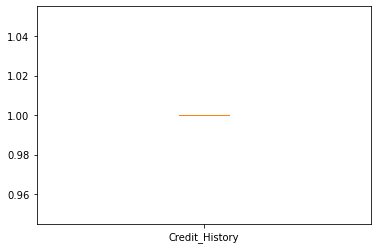

In [36]:
# Using box plot for checking the presence of outliers.
for i in cont_data:
    plt.boxplot(cont_data[i], labels = [i])
    plt.show()

In [37]:
## ouliers have been removed

In [38]:
cont_data.skew()

ApplicantIncome      1.039846
CoapplicantIncome    1.012763
LoanAmount           0.648627
Loan_Amount_Term     0.000000
Credit_History       0.000000
dtype: float64

In [39]:
## Removing skewness

In [40]:
##from sklearn.preprocessing import PowerTransformer

In [41]:
##pt=PowerTransformer()


In [42]:
##

In [43]:
##cont_data.skew()

In [44]:
## the skewness has been removed

In [45]:
cont_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,146.412162,360.0,1.0
1,4583.0,1508.0,128.000000,360.0,1.0
2,3000.0,0.0,66.000000,360.0,1.0
3,2583.0,2358.0,120.000000,360.0,1.0
4,6000.0,0.0,141.000000,360.0,1.0
...,...,...,...,...,...
609,2900.0,0.0,71.000000,360.0,1.0
610,4106.0,0.0,40.000000,360.0,1.0
611,8072.0,240.0,253.000000,360.0,1.0
612,7583.0,0.0,187.000000,360.0,1.0


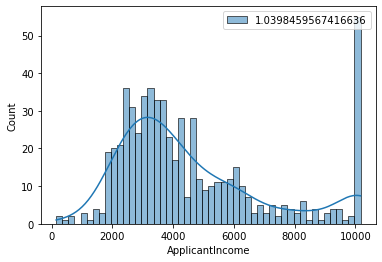

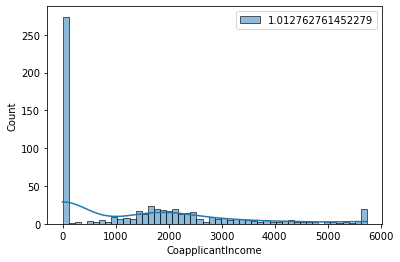

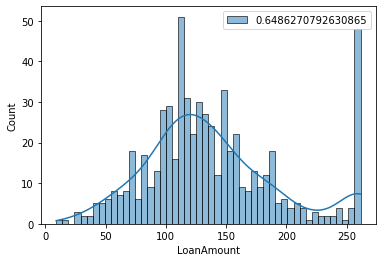

C:\Users\Rakesh Lodem\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


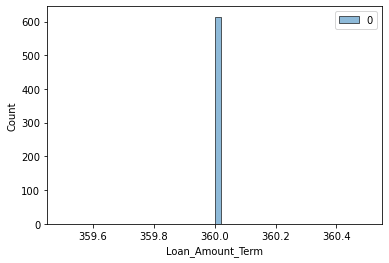

C:\Users\Rakesh Lodem\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


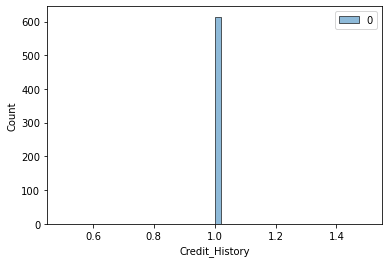

In [46]:
for i in a:
    sns.histplot(cont_data[i], kde = True, bins = 50, label = cont_data[i].skew())
    plt.legend(loc = 'upper right')
    plt.show()

<AxesSubplot:>

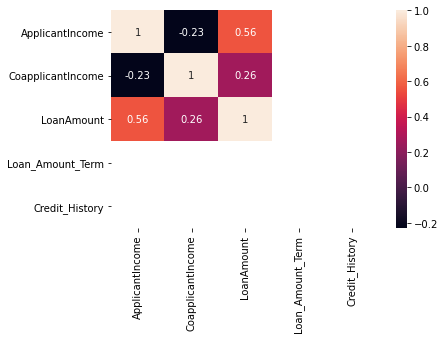

In [47]:
# Finding the correlation.
corr = cont_data.corr()
# Plotting the heatmap.
sns.heatmap(corr, annot = True)

In [48]:
##Exploring the categorical variables

In [49]:
cat_vars = df.select_dtypes(include = ['object'])
cat_vars

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,Y
610,Male,Yes,3+,Graduate,No,Rural,Y
611,Male,Yes,1,Graduate,No,Urban,Y
612,Male,Yes,2,Graduate,No,Urban,Y


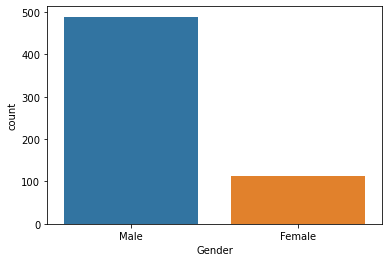

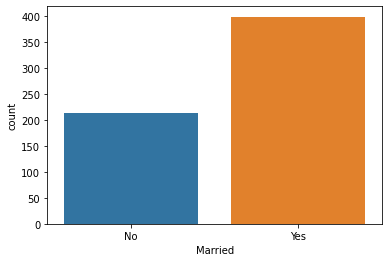

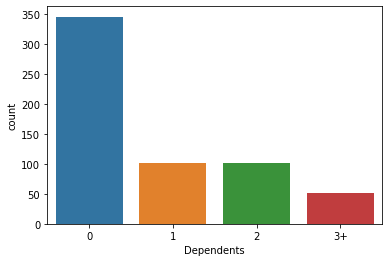

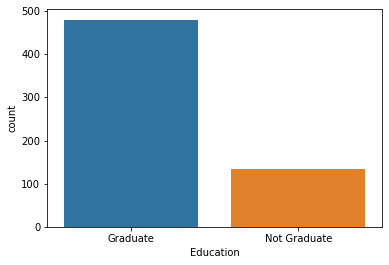

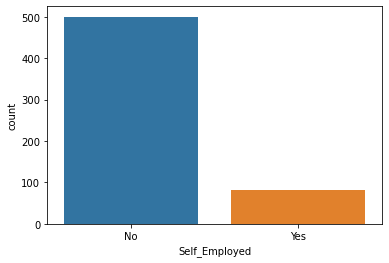

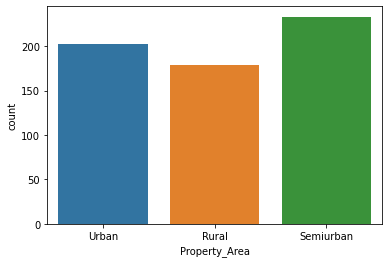

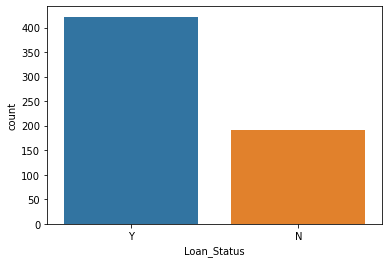

In [50]:
# Looking at the data distribution for different values.
plt.rcParams['figure.figsize'] = (6, 4)
for i in cat_vars:
    sns.countplot(x = cat_vars[i])
    plt.show()

In [51]:
# Count values of different values for each variables.
for i in cat_vars:
    print(cat_vars[i].value_counts(), end = '\n---------\n\n')

Male      489
Female    112
Name: Gender, dtype: int64
---------

Yes    398
No     213
Name: Married, dtype: int64
---------

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
---------

Graduate        480
Not Graduate    134
Name: Education, dtype: int64
---------

No     500
Yes     82
Name: Self_Employed, dtype: int64
---------

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
---------

Y    422
N    192
Name: Loan_Status, dtype: int64
---------



In [52]:
cat_vars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Gender         601 non-null    object
 1   Married        611 non-null    object
 2   Dependents     599 non-null    object
 3   Education      614 non-null    object
 4   Self_Employed  582 non-null    object
 5   Property_Area  614 non-null    object
 6   Loan_Status    614 non-null    object
dtypes: object(7)
memory usage: 33.7+ KB


In [53]:
cat_data = cat_vars.copy()
cat_data = pd.get_dummies(cat_data, drop_first = True) ## numerical features to continuos features
cat_data

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,1,0,0,0,0,0,0,0,1,1
1,1,1,1,0,0,0,0,0,0,0
2,1,1,0,0,0,0,1,0,1,1
3,1,1,0,0,0,1,0,0,1,1
4,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,0,0,0,1
610,1,1,0,0,1,0,0,0,0,1
611,1,1,1,0,0,0,0,0,1,1
612,1,1,0,1,0,0,0,0,1,1


In [54]:
cat_data.isnull().sum()

Gender_Male                0
Married_Yes                0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Not Graduate     0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
Loan_Status_Y              0
dtype: int64

In [55]:
y=cat_data['Loan_Status_Y']
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status_Y, Length: 614, dtype: uint8

<AxesSubplot:>

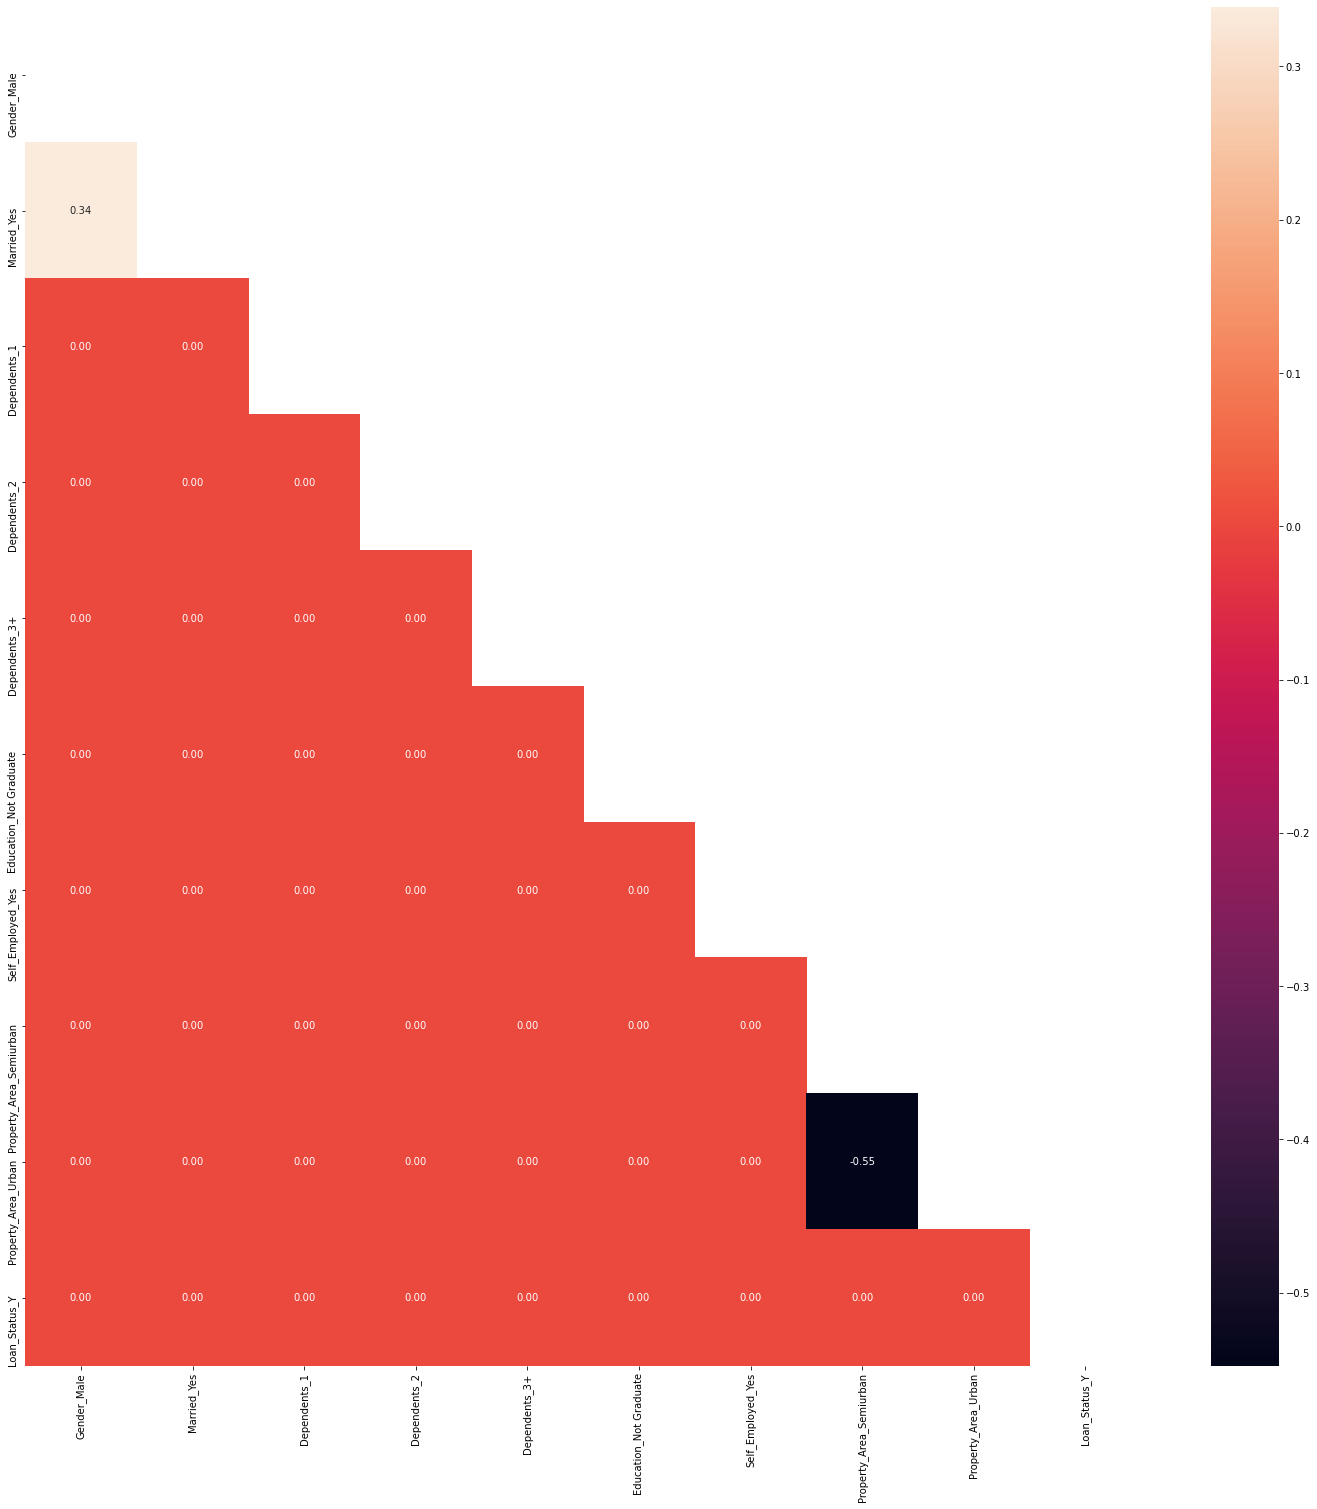

In [56]:
# Finding the correlation.
corr = cat_data.corr()

# Setting the size of figure.
plt.rcParams['figure.figsize'] = (25, 25)

# Argument Trimming out the values above the main diagonal.
mask = np.triu(corr)

# Setting low correlation value to 0.
corr[(corr.values < 0.3) & (corr.values > -0.3)] = 0

# Plotting the heatmap.
sns.heatmap(corr, annot = True, fmt = '.2f', mask = mask)

In [57]:
# Combining Numerical and Categorical data.
final_data = pd.concat([cont_data, cat_data], axis = 1)
final_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849.0,0.0,146.412162,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583.0,1508.0,128.000000,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000.0,0.0,66.000000,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583.0,2358.0,120.000000,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000.0,0.0,141.000000,360.0,1.0,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900.0,0.0,71.000000,360.0,1.0,0,0,0,0,0,0,0,0,0,1
610,4106.0,0.0,40.000000,360.0,1.0,1,1,0,0,1,0,0,0,0,1
611,8072.0,240.0,253.000000,360.0,1.0,1,1,1,0,0,0,0,0,1,1
612,7583.0,0.0,187.000000,360.0,1.0,1,1,0,1,0,0,0,0,1,1


<AxesSubplot:>

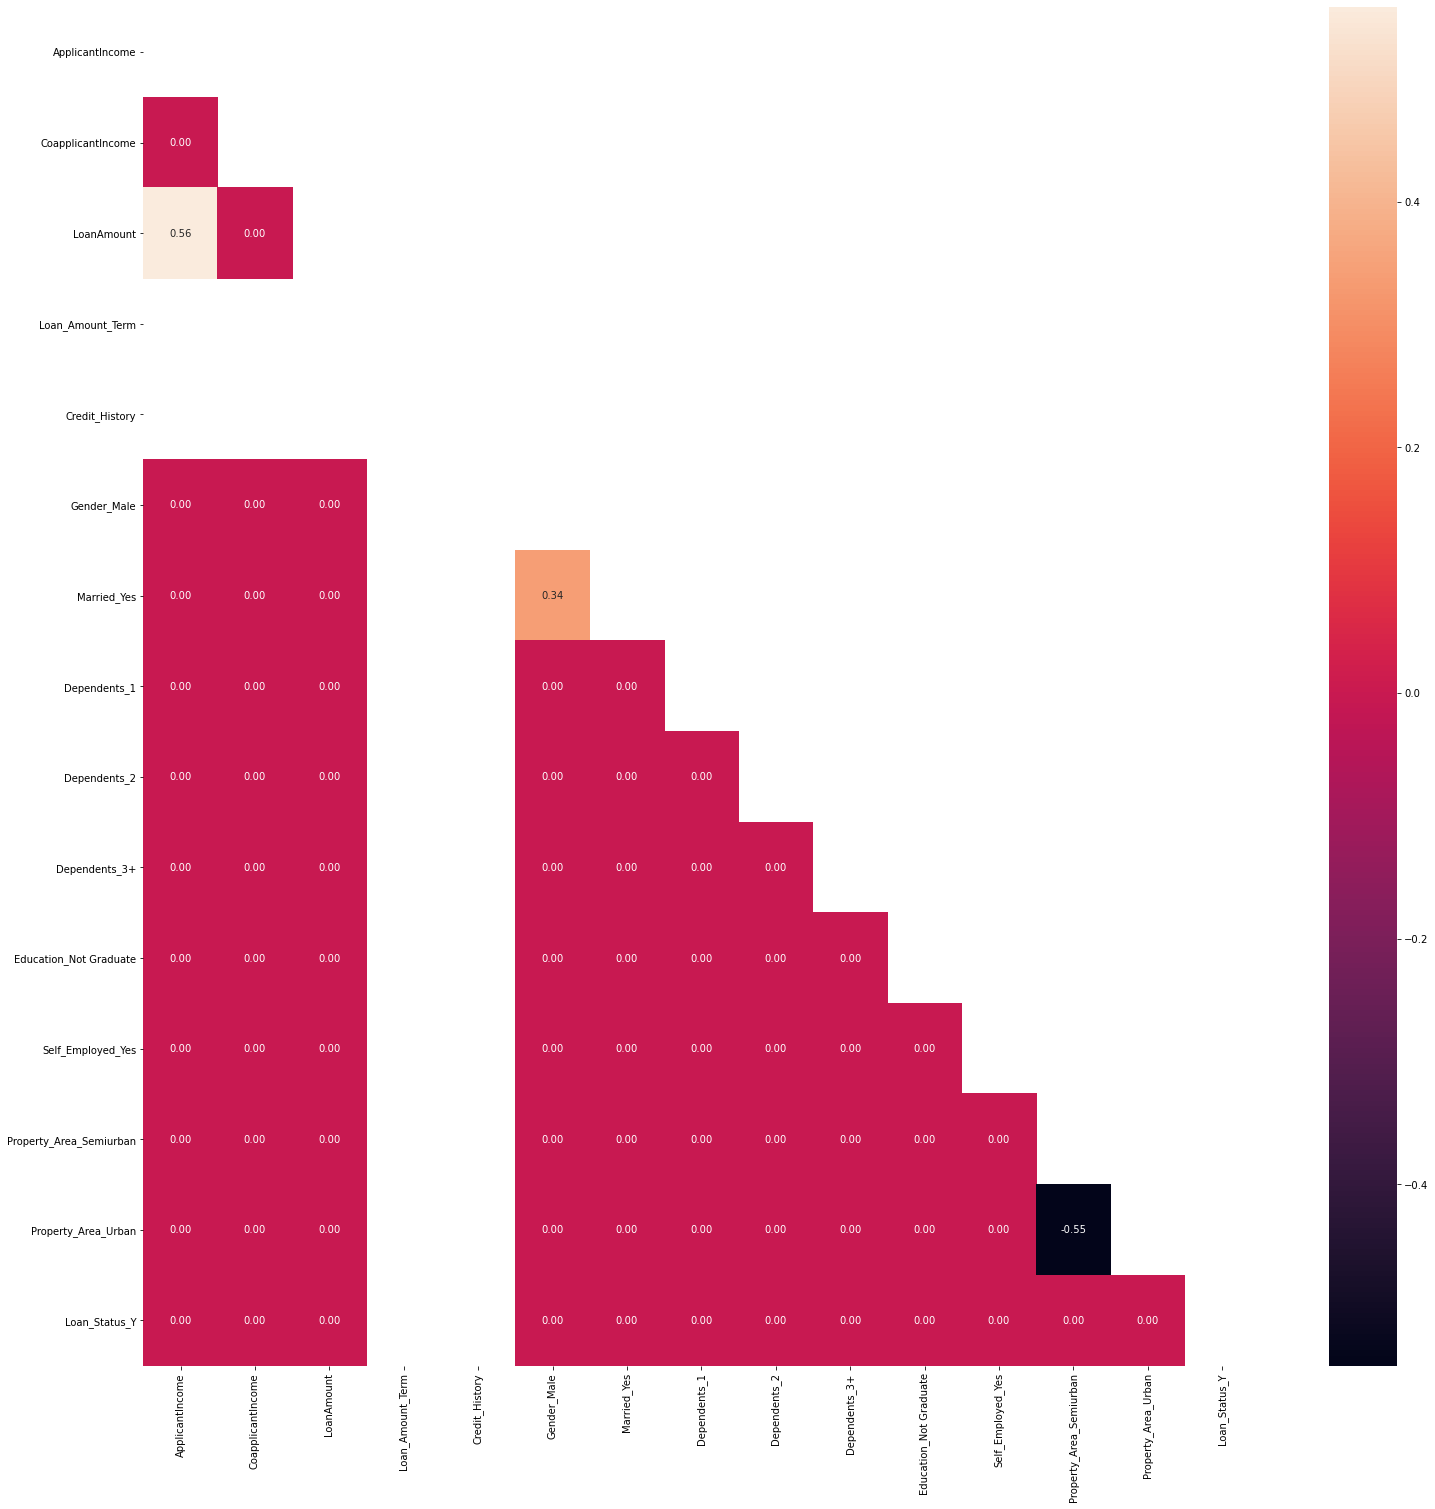

In [58]:
# Finding the correlation.
corr = final_data.corr()

# Setting the size of figure.
plt.rcParams['figure.figsize'] = (25, 25)

# Argument Trimming out the values above the main diagonal.
mask = np.triu(corr)

# Setting low correlation value to 0.
corr[(corr.values < 0.3) & (corr.values > -0.3)] = 0

# Plotting the heatmap.
sns.heatmap(corr, annot = True, fmt = '.2f', mask = mask)

In [59]:
## no clarity in the heat map

In [60]:
final_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849.0,0.0,146.412162,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583.0,1508.0,128.000000,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000.0,0.0,66.000000,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583.0,2358.0,120.000000,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000.0,0.0,141.000000,360.0,1.0,1,0,0,0,0,0,0,0,1,1


In [61]:
final_data.shape

(614, 15)

In [62]:
final_data.isnull().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Gender_Male                0
Married_Yes                0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Not Graduate     0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
Loan_Status_Y              0
dtype: int64

In [63]:
final_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
count,614.000000,614.000000,614.000000,614.0,614.0,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,4617.111564,1419.702231,138.025354,360.0,1.0,0.796417,0.648208,0.166124,0.164495,0.083062,0.218241,0.133550,0.379479,0.328990,0.687296
std,2479.851729,1624.605892,55.773951,0.0,0.0,0.402991,0.477919,0.372495,0.371027,0.276201,0.413389,0.340446,0.485653,0.470229,0.463973
min,150.000000,0.000000,9.000000,360.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.0,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3812.500000,1188.500000,129.000000,360.0,1.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.0,1.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,10171.250000,5743.125000,261.500000,360.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [64]:
## we will drop the variables which shows the correlation value greater than 0.7

In [65]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
                return col_corr

In [66]:
corr_features=correlation(final_data,0.3)
len(set(corr_features))

1

In [67]:
## no need to remove any column here

In [68]:
x=final_data.drop(columns=['Loan_Status_Y'],axis=1)
x

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849.0,0.0,146.412162,360.0,1.0,1,0,0,0,0,0,0,0,1
1,4583.0,1508.0,128.000000,360.0,1.0,1,1,1,0,0,0,0,0,0
2,3000.0,0.0,66.000000,360.0,1.0,1,1,0,0,0,0,1,0,1
3,2583.0,2358.0,120.000000,360.0,1.0,1,1,0,0,0,1,0,0,1
4,6000.0,0.0,141.000000,360.0,1.0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900.0,0.0,71.000000,360.0,1.0,0,0,0,0,0,0,0,0,0
610,4106.0,0.0,40.000000,360.0,1.0,1,1,0,0,1,0,0,0,0
611,8072.0,240.0,253.000000,360.0,1.0,1,1,1,0,0,0,0,0,1
612,7583.0,0.0,187.000000,360.0,1.0,1,1,0,1,0,0,0,0,1


In [69]:

y=final_data.Loan_Status_Y
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status_Y, Length: 614, dtype: uint8

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
St=StandardScaler()

In [72]:
St.fit_transform(x)

array([[ 0.49716393, -0.87458735,  0.15049402, ..., -0.39260074,
        -0.7820157 ,  1.42814704],
       [-0.0137667 ,  0.05439458, -0.17989632, ..., -0.39260074,
        -0.7820157 , -0.70020801],
       [-0.65263178, -0.87458735, -1.29243272, ...,  2.54711697,
        -0.7820157 ,  1.42814704],
       ...,
       [ 1.39431937, -0.72673876,  2.06312062, ..., -0.39260074,
        -0.7820157 ,  1.42814704],
       [ 1.19696939, -0.87458735,  0.87880768, ..., -0.39260074,
        -0.7820157 ,  1.42814704],
       [-0.0137667 , -0.87458735, -0.09017564, ...,  2.54711697,
         1.2787467 , -0.70020801]])

In [73]:
## feature selection

In [74]:
from sklearn.feature_selection import SelectPercentile

In [75]:
from sklearn.feature_selection import chi2

In [76]:
sp=SelectPercentile(score_func=chi2,percentile=80)

In [77]:
sp_=sp.fit(x,y)

In [78]:
cols=sp_.get_support(indices=True)

In [79]:
features=x.columns[cols]

In [80]:
features

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Gender_Male',
       'Married_Yes', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [81]:
df_scores=pd.DataFrame({'features':x.columns,'chi2score':sp_.scores_,'pvalue':sp_.pvalues_})
df_scores

,features,chi2score,pvalue
0,ApplicantIncome,1.595951e-01,6.895296e-01
1,CoapplicantIncome,1.636363e+02,1.816446e-37
2,LoanAmount,3.742867e+01,9.481816e-10
3,Loan_Amount_Term,0.000000e+00,1.000000e+00
4,Credit_History,4.207258e-30,1.000000e+00
5,Gender_Male,8.068866e-02,7.763663e-01
6,Married_Yes,1.534292e+00,2.154695e-01
7,Dependents_1,7.683998e-01,3.807125e-01
8,Dependents_2,1.996446e+00,1.576685e-01
9,Dependents_3+,3.841999e-01,5.353641e-01


In [82]:
import numpy as np

In [83]:
print(cols)

[ 0  1  2  5  6  7  8  9 10 12 13]


In [84]:
print(features)

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Gender_Male',
       'Married_Yes', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')


In [85]:
x_new=x[features]
x_new

,ApplicantIncome,CoapplicantIncome,LoanAmount,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban
0,5849.0,0.0,146.412162,1,0,0,0,0,0,0,1
1,4583.0,1508.0,128.000000,1,1,1,0,0,0,0,0
2,3000.0,0.0,66.000000,1,1,0,0,0,0,0,1
3,2583.0,2358.0,120.000000,1,1,0,0,0,1,0,1
4,6000.0,0.0,141.000000,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,2900.0,0.0,71.000000,0,0,0,0,0,0,0,0
610,4106.0,0.0,40.000000,1,1,0,0,1,0,0,0
611,8072.0,240.0,253.000000,1,1,1,0,0,0,0,1
612,7583.0,0.0,187.000000,1,1,0,1,0,0,0,1


In [86]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status_Y, Length: 614, dtype: uint8

In [87]:
from sklearn.model_selection import train_test_split,cross_val_score
#importing models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [88]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.30,random_state=41)

In [89]:
## k nearest neighborsclassifier

In [90]:
kn=KNeighborsClassifier()

In [91]:
kn.fit(x_train,y_train)

KNeighborsClassifier()

In [92]:
y_pred=kn.predict(x_test)

In [93]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [94]:
accuracy_score(y_pred,y_test)

0.5891891891891892

In [95]:
confusion_matrix(y_pred,y_test)

array([[10, 22],
       [54, 99]], dtype=int64)

In [96]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.31      0.16      0.21        64\n           1       0.65      0.82      0.72       121\n\n    accuracy                           0.59       185\n   macro avg       0.48      0.49      0.47       185\nweighted avg       0.53      0.59      0.54       185\n'

In [97]:
## support vector machine

In [98]:
sv=SVC()

In [99]:
sv.fit(x_train,y_train)

SVC()

In [100]:
y_pred=sv.predict(x_test)

In [101]:
accuracy_score(y_pred,y_test)

0.654054054054054

In [102]:
confusion_matrix(y_test,y_pred)

array([[  0,  64],
       [  0, 121]], dtype=int64)

In [103]:
classification_report(y_test,y_pred)

C:\Users\Rakesh Lodem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rakesh Lodem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rakesh Lodem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00        64\n           1       0.65      1.00      0.79       121\n\n    accuracy                           0.65       185\n   macro avg       0.33      0.50      0.40       185\nweighted avg       0.43      0.65      0.52       185\n'

In [104]:
##DecisionTreeclassifier

In [105]:
dt=DecisionTreeClassifier()

In [106]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [107]:
y_pred=dt.predict(x_test)

In [108]:
accuracy_score(y_pred,y_test)

0.6

In [109]:
confusion_matrix(y_test,y_pred)

array([[21, 43],
       [31, 90]], dtype=int64)

In [110]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.40      0.33      0.36        64\n           1       0.68      0.74      0.71       121\n\n    accuracy                           0.60       185\n   macro avg       0.54      0.54      0.54       185\nweighted avg       0.58      0.60      0.59       185\n'

In [111]:
## randomForestClassifier

In [112]:
rf=RandomForestClassifier()

In [113]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [114]:
y_pred=rf.predict(x_test)

In [115]:
accuracy_score(y_test,y_pred)

0.6432432432432432

In [116]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.44      0.12      0.20        64\n           1       0.66      0.92      0.77       121\n\n    accuracy                           0.64       185\n   macro avg       0.55      0.52      0.48       185\nweighted avg       0.59      0.64      0.57       185\n'

In [117]:
## adaboostclassifier

In [118]:
ab=AdaBoostClassifier()

In [119]:
ab.fit(x_train,y_train)

AdaBoostClassifier()

In [120]:
y_pred=ab.predict(x_test)

In [121]:
accuracy_score(y_test,y_pred)

0.6324324324324324

In [122]:
confusion_matrix(y_test,y_pred)

array([[  4,  60],
       [  8, 113]], dtype=int64)

In [123]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.33      0.06      0.11        64\n           1       0.65      0.93      0.77       121\n\n    accuracy                           0.63       185\n   macro avg       0.49      0.50      0.44       185\nweighted avg       0.54      0.63      0.54       185\n'

In [124]:
## GradientBoostingClassifier

In [125]:
gb=GradientBoostingClassifier()

In [126]:
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [127]:
y_pred=gb.predict(x_test)

In [128]:
accuracy_score(y_test,y_pred)

0.6432432432432432

In [129]:
## support vector and gradient boosting works better

In [130]:
## hyperparametertuning

In [131]:
from sklearn.model_selection import GridSearchCV

In [132]:
grid={'C':[1,10,100,1000],'kernel':['rbf','kernel'],'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}

In [133]:
grid_search_cv=GridSearchCV(SVC(),grid,scoring='accuracy',n_jobs=-1)

In [134]:
grid_search_cv.fit(x_train,y_train)

C:\Users\Rakesh Lodem\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.70632011        nan 0.70632011        nan 0.70632011        nan
 0.70632011        nan 0.70632011        nan 0.69931601        nan
 0.69931601        nan 0.69931601        nan 0.69931601        nan
 0.69931601        nan 0.69466484        nan 0.69701778        nan
 0.70166895        nan 0.70166895        nan 0.70166895        nan
 0.70166895        nan 0.70399453        nan 0.70399453        nan
 0.69699042        nan 0.69466484        nan 0.69701778        nan
 0.70166895        nan 0.70166895        nan 0.70166895        nan
 0.70166895        nan 0.70399453        nan 0.70399453        nan
 0.69699042        nan 0.69466484        nan 0.69701778        nan
 0.70166895        nan 0.70166895        nan 0.70166895        nan
 0.70166895        nan 0.70399453        nan 0.70399453        nan]
  warnings.warn(


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
                         'kernel': ['rbf', 'kernel']},
             scoring='accuracy')

In [135]:
grid_search_cv.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [136]:
m=SVC(C=1,gamma=0.1,kernel='rbf')

m.fit(x_train,y_train)

In [137]:
m.fit(x_train,y_train)

SVC(C=1, gamma=0.1)

In [138]:
y_pred=m.predict(x_test)

In [139]:
accuracy_score(y_test,y_pred)

0.6486486486486487

In [140]:
confusion_matrix(y_test,y_pred)

array([[  0,  64],
       [  1, 120]], dtype=int64)

In [141]:
classification_report(y_pred,y_test)

'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00         1\n           1       0.99      0.65      0.79       184\n\n    accuracy                           0.65       185\n   macro avg       0.50      0.33      0.39       185\nweighted avg       0.99      0.65      0.78       185\n'

In [142]:
##Final model is the SVC

Text(0.5, 1.0, 'svc')

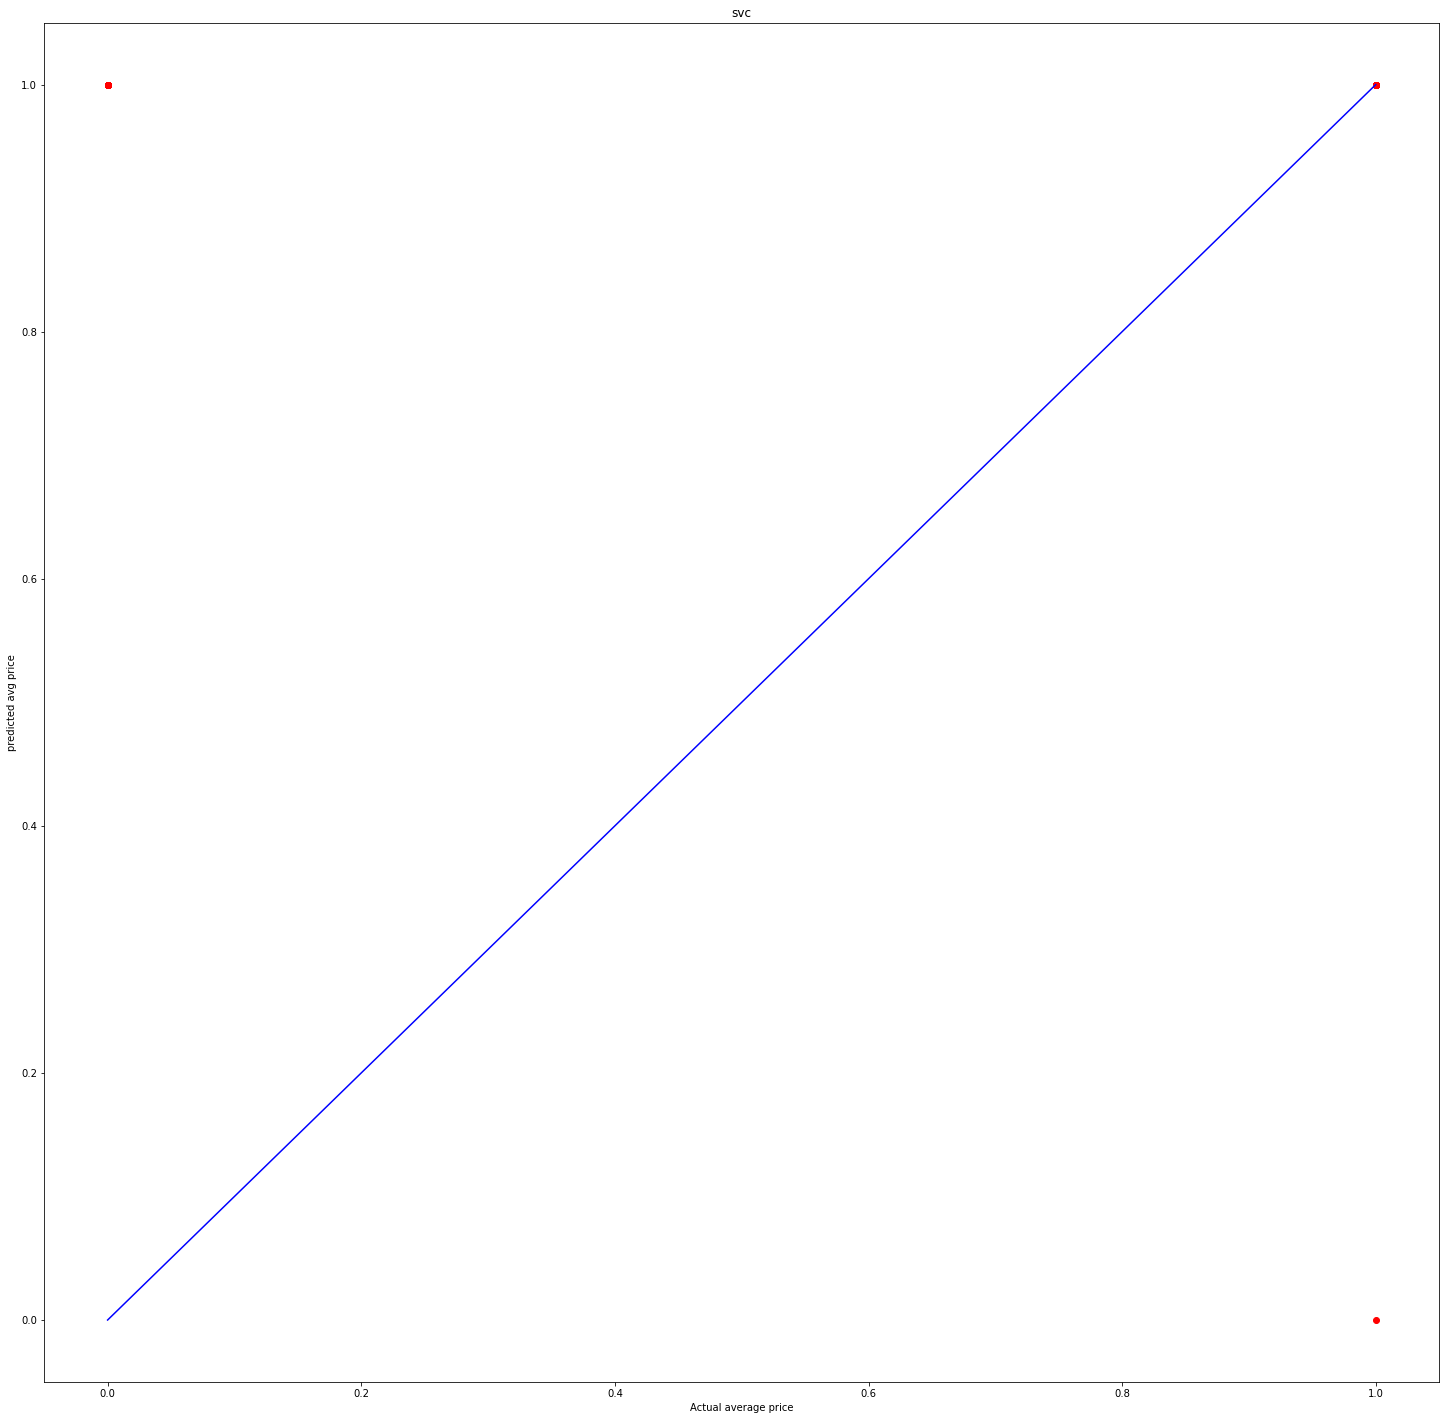

In [147]:
plt.scatter(x=y_test,y=y_pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual average price')
plt.ylabel('predicted avg price')
plt.title('svc')

In [148]:
a=np.array(y_test)
predicted=np.array(sv.predict(x_test))
df_com=pd.DataFrame({'true':a,'predicted':predicted},index=range(len(a)))

In [149]:
df_com

,true,predicted
0,0,1
1,0,1
2,1,1
3,1,1
4,1,1
...,...,...
180,1,1
181,1,1
182,0,1
183,0,1


In [150]:
##saving the model

In [151]:
import pickle

In [152]:
filename='LOAN_STATUS_PREDICTION.pkl'

In [154]:
pickle.dump(sv,open(filename,'wb'))